Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 164us/step - loss: 0.5012 - accuracy: 0.4833 - val_loss: 0.4760 - val_accuracy: 0.4895
Epoch 2/5
60000/60000 [==============================] - 10s 162us/step - loss: 0.4483 - accuracy: 0.4938 - val_loss: 0.4241 - val_accuracy: 0.4932
Epoch 3/5
60000/60000 [==============================] - 10s 166us/step - loss: 0.4022 - accuracy: 0.4961 - val_loss: 0.3905 - val_accuracy: 0.4937
Epoch 4/5
60000/60000 [==============================] - 10s 166us/step - loss: 0.3836 - accuracy: 0.4957 - val_loss: 0.3808 - val_accuracy: 0.4935
Epoch 5/5
60000/60000 [==============================] - 10s 167us/step - loss: 0.3761 - accuracy: 0.4957 - val_loss: 0.3748 - val_accuracy: 0.4940


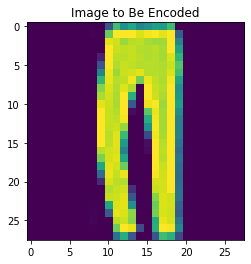

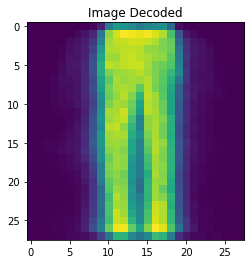

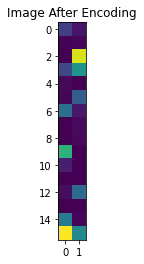

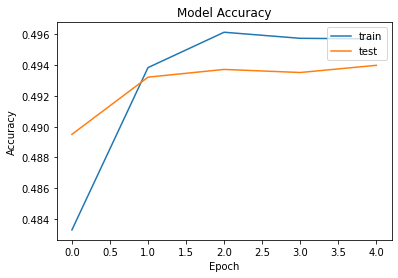

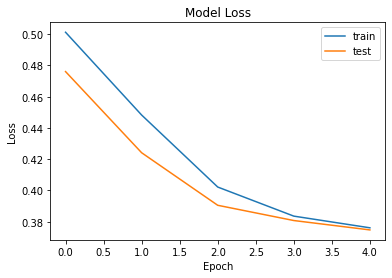

In [2]:
from keras.layers import Input, Dense
from keras.models import Model
from matplotlib import pyplot as plt

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Adding Hidden Layer on Both Sides
encoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(encoded)

# "decoded" is the lossy reconstruction of the input
output_img = Dense(784, activation='sigmoid')(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, output_img)

# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


# Image Before Reconstruction
plt.imshow(x_test[2].reshape(28,28))
plt.title("Image to Be Encoded")
plt.show()

prediction = autoencoder.predict(x_test[2].reshape(1,784))

# Image After Reconstruction
plt.imshow(prediction.reshape(28,28))
plt.title("Image Decoded")
plt.show()

# Bonus point to Plot Data after Encoding
encoder = Model(input_img, encoded)
prediction = encoder.predict(x_test[2].reshape(1,784))
plt.imshow(prediction.reshape(16,2))
plt.title("Image After Encoding")
plt.show()

# Summarize History for Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Summarize History for Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()